In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data= pd.read_csv("C:\\Users\\PRITESH\\Downloads\\adult.csv")

In [13]:
df=data.copy()

In [14]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
df.drop(['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)

In [16]:
df.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,>50K


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  country         32561 non-null  object
 11  salary          32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [19]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
count,32561.000000,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561,32561
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,42,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,29170,24720
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,40.437456,NaN,NaN
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,12.347429,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


In [20]:
df.shape

(32561, 12)

In [21]:
#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()

In [22]:
#encoding salary column
#df['salary']=df['salary'].replace('<=50K',0)
df['salary']=df['salary'].replace('>50K',1)

In [23]:
#people whose earning less than 50K
df[df['salary']==0].shape

(0, 12)

In [24]:
#people whose earning more than 50K
df[df['salary']==1].shape

(7841, 12)

In [25]:
#cleaning rows
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [6]:
# x['workclass']=x['workclass'].fillna(x['workclass'].mode(),axis=0)

In [7]:
# x['occupation']=x['occupation'].fillna(x['occupation'].mode(),axis=0)

In [8]:
# x['native.country']=x['native.country'].fillna((x['native.country'].mode()),inplace=True)

In [26]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
country           0
salary            0
dtype: int64

In [27]:

#doing private job and salary more than 50K
new_df=df[df['workclass']=='Private']
print(len(new_df[new_df['salary']==1]))
new_df[new_df['salary']==1].head(2)

4876


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


<AxesSubplot:xlabel='salary'>

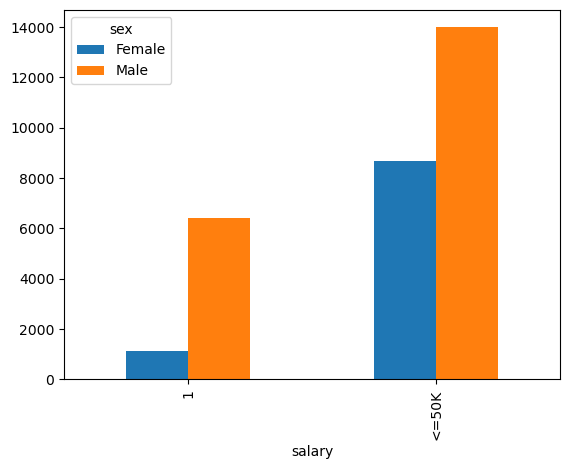

In [28]:
#cheacking male and female ration according to their salary
class_sex = pd.crosstab(df['salary'],df['sex'])
class_sex.plot(kind='bar')

In [29]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [30]:
#how many of people whose age above average earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['salary']==1]))
avg_age[avg_age['salary']==1].head(2)

5042


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


In [31]:
#how many of people whose age above avarge earn less than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['salary']==0]))
avg_age[avg_age['salary']==0].head(2)

0


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary


<AxesSubplot:xlabel='salary'>

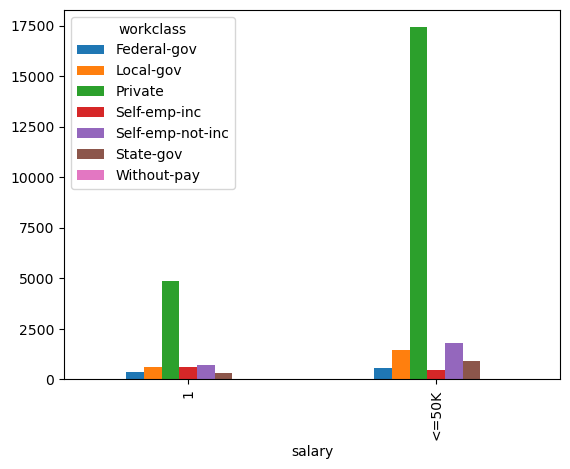

In [34]:
#checking distribution of people in workclass according to salary
class_salary = pd.crosstab(df['salary'],df['workclass'])
class_salary.plot(kind='bar')

<AxesSubplot:xlabel='education'>

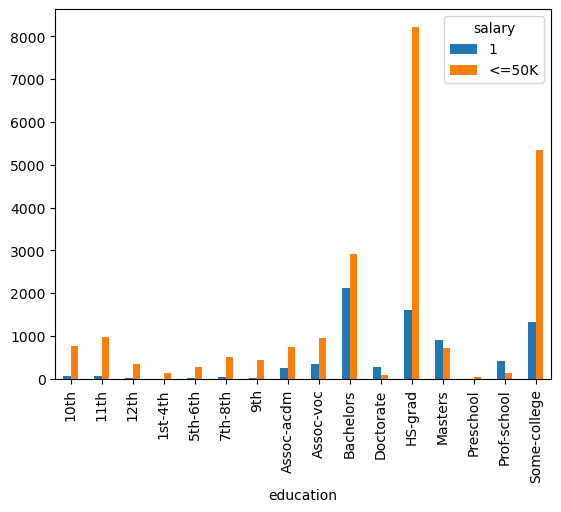

In [35]:
#checking distribution of people according to salary
salary_education = pd.crosstab(df['education'],df['salary'])
salary_education.plot(kind='bar')

In [36]:
#numeric columns
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)

        
num_col = num_col[0:2]
num_col 

['age', 'education-num']

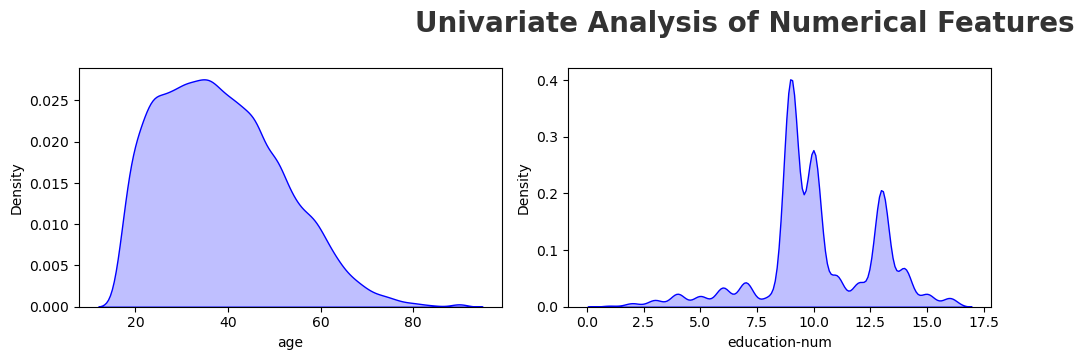

In [37]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [38]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col        

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

<Figure size 640x480 with 0 Axes>

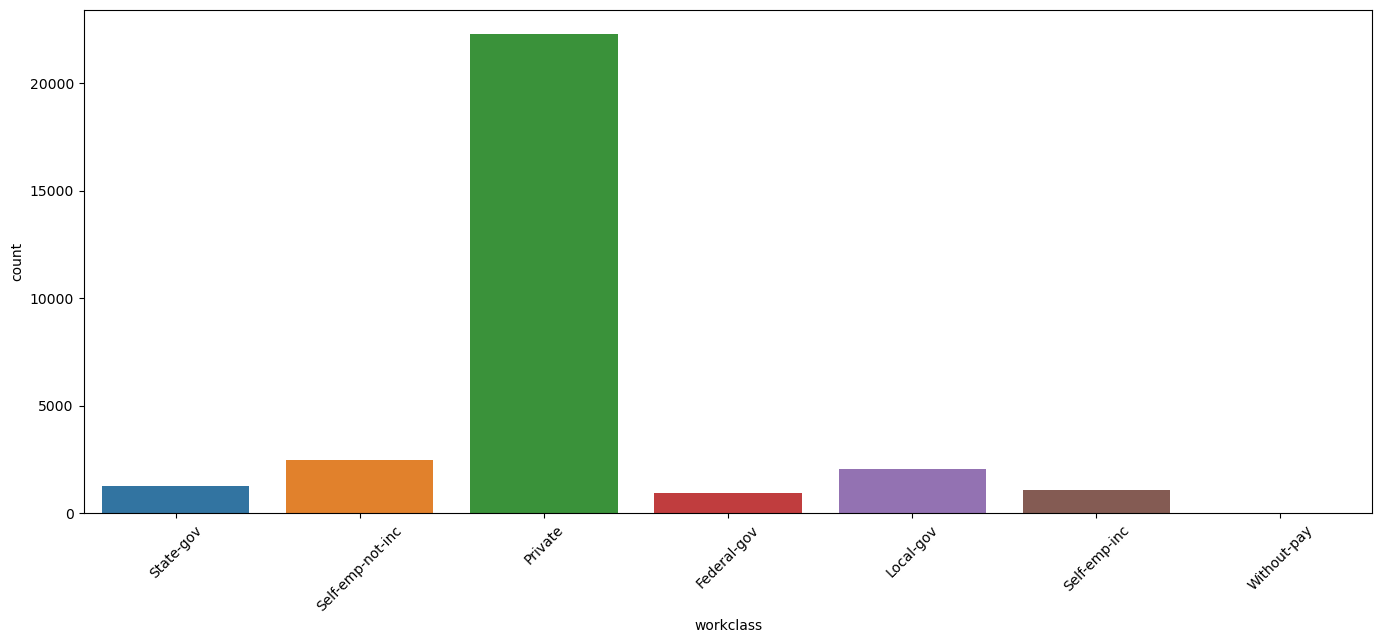

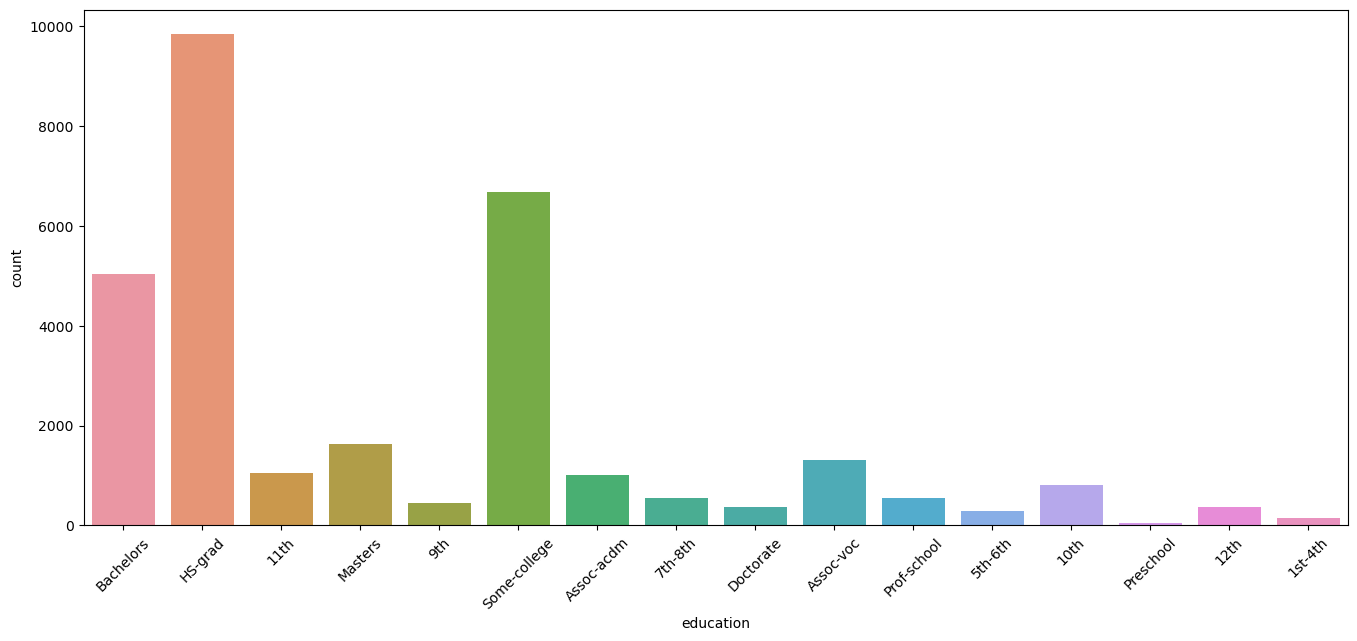

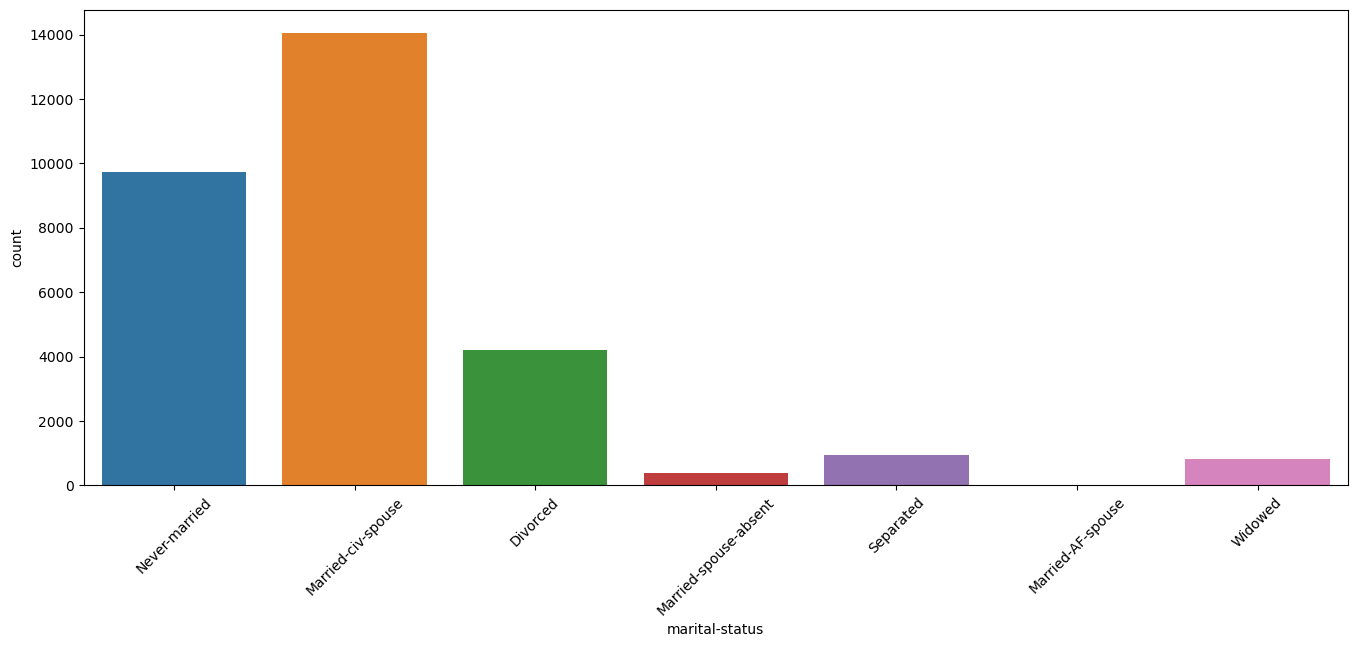

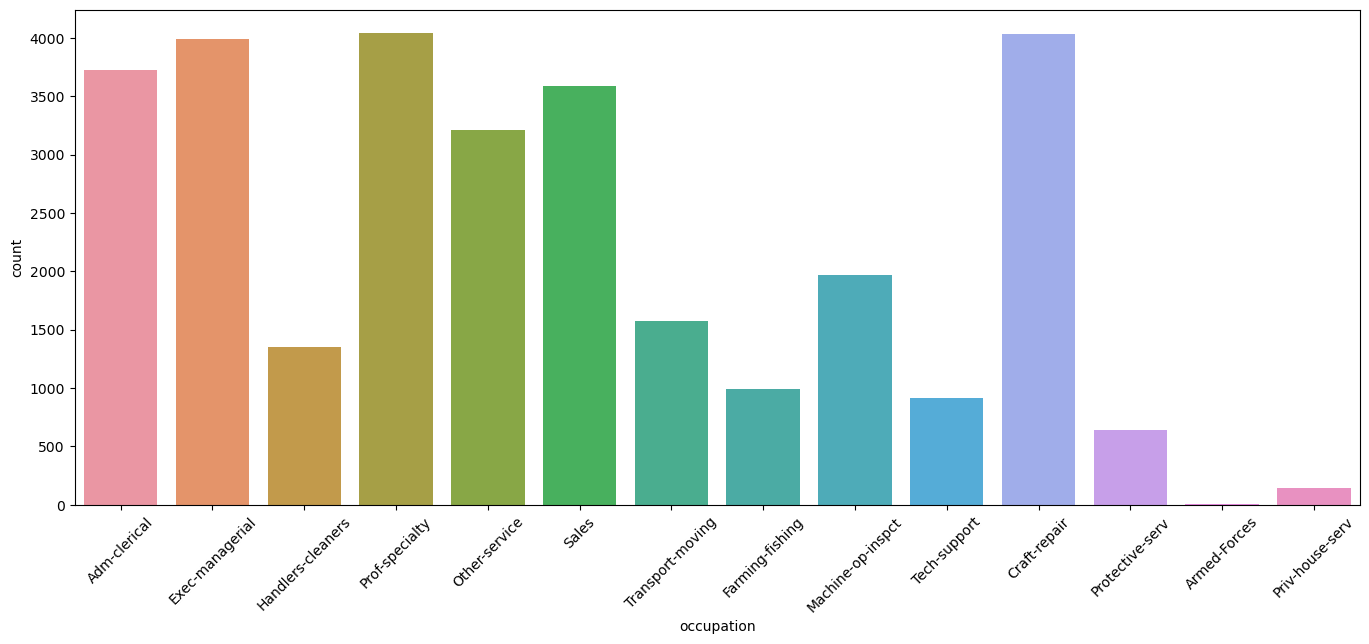

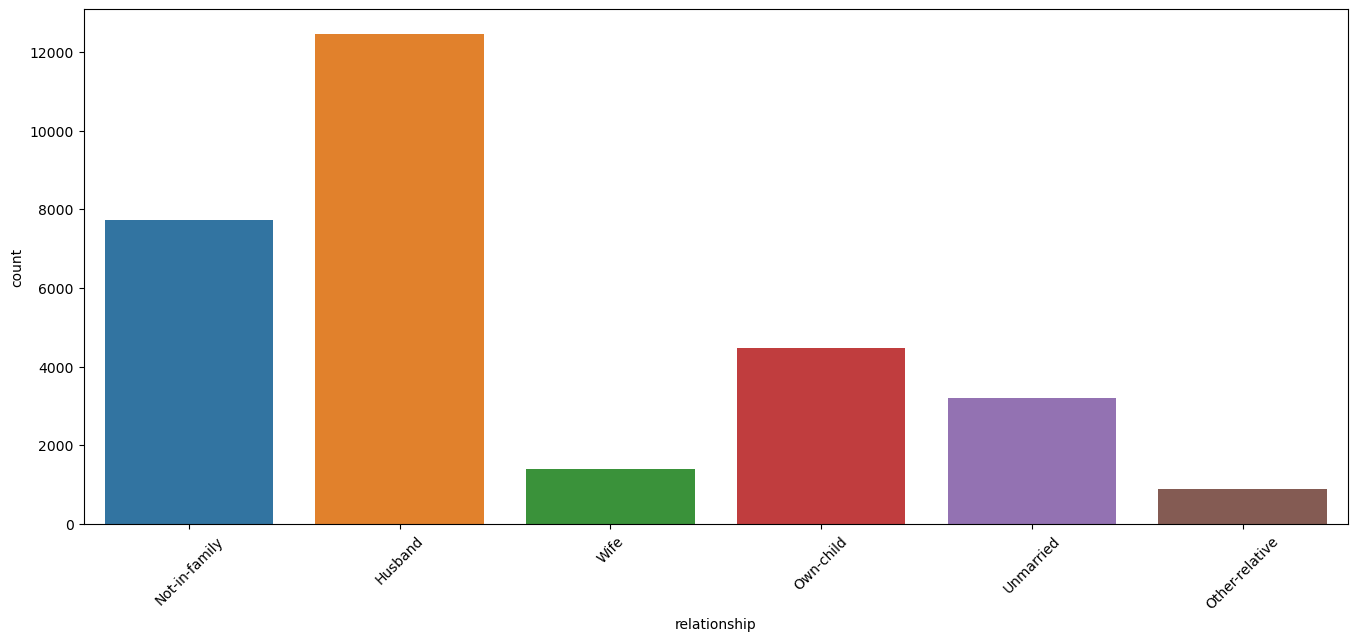

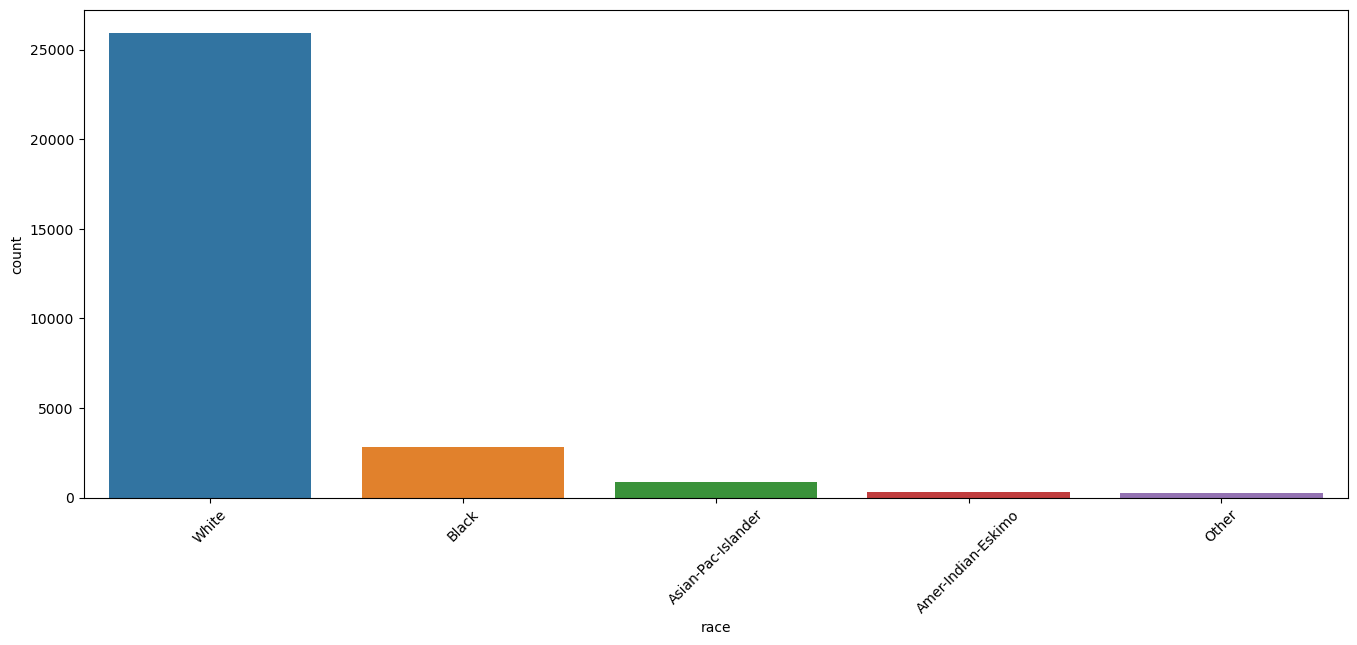

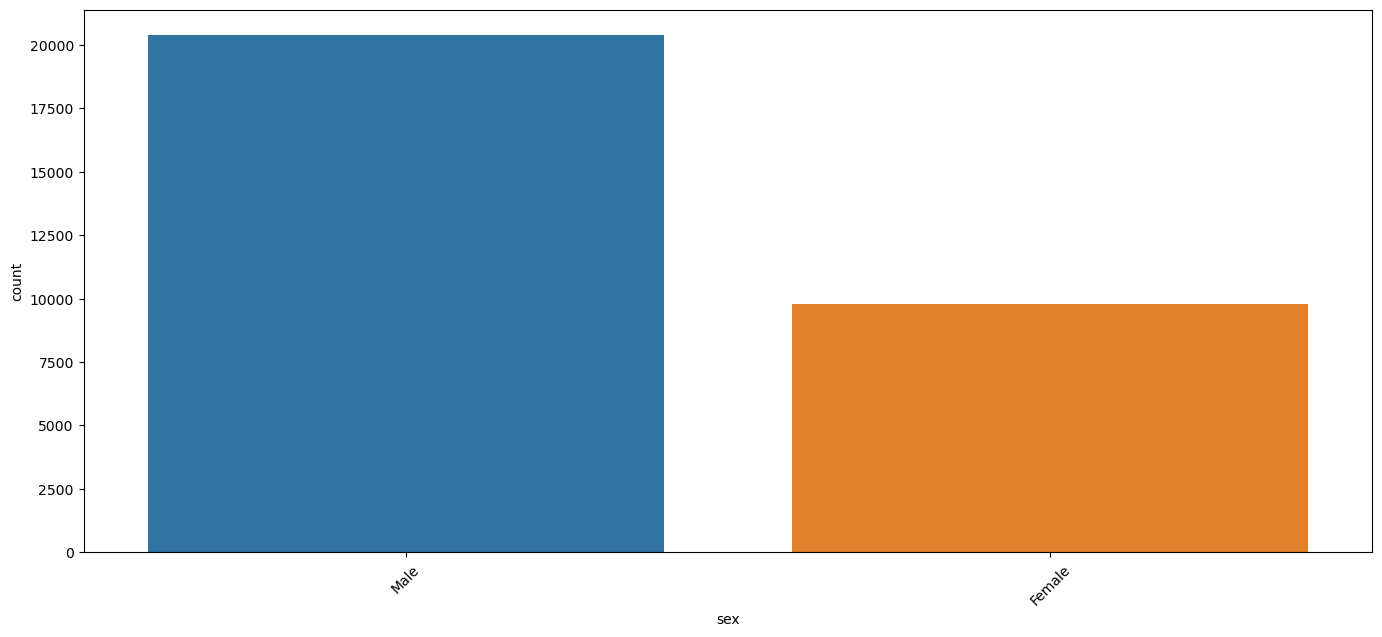

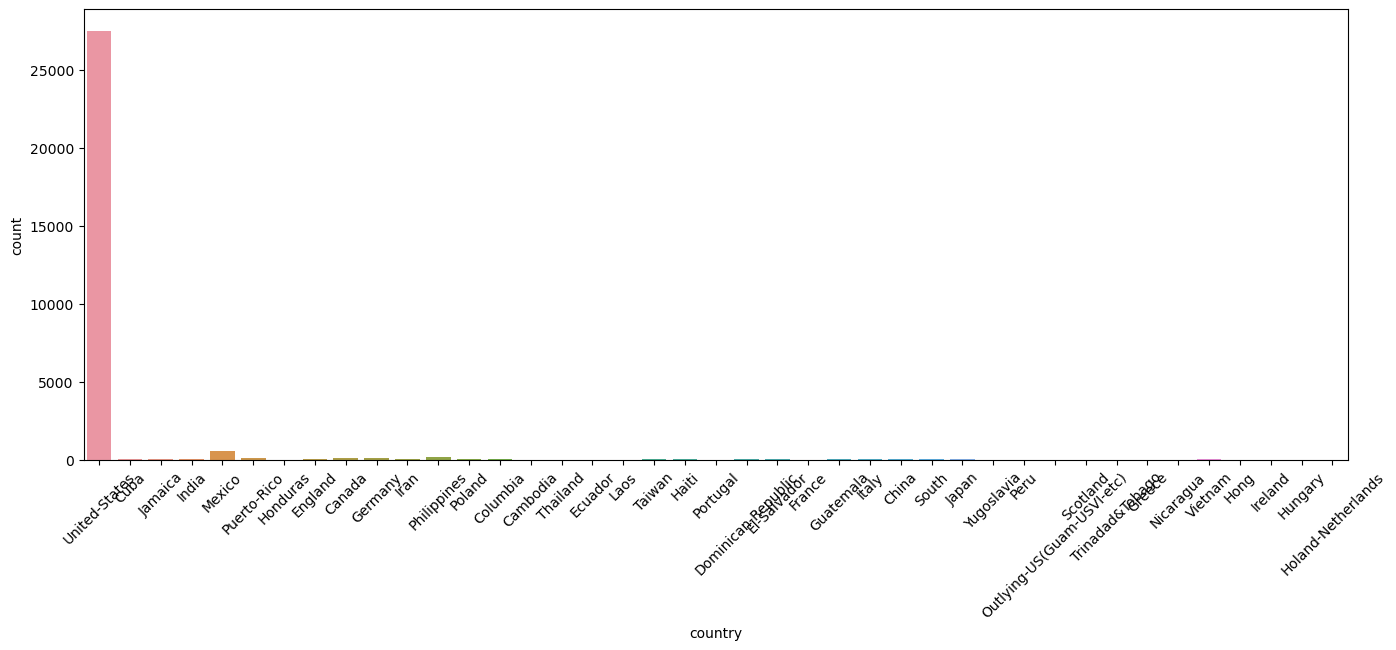

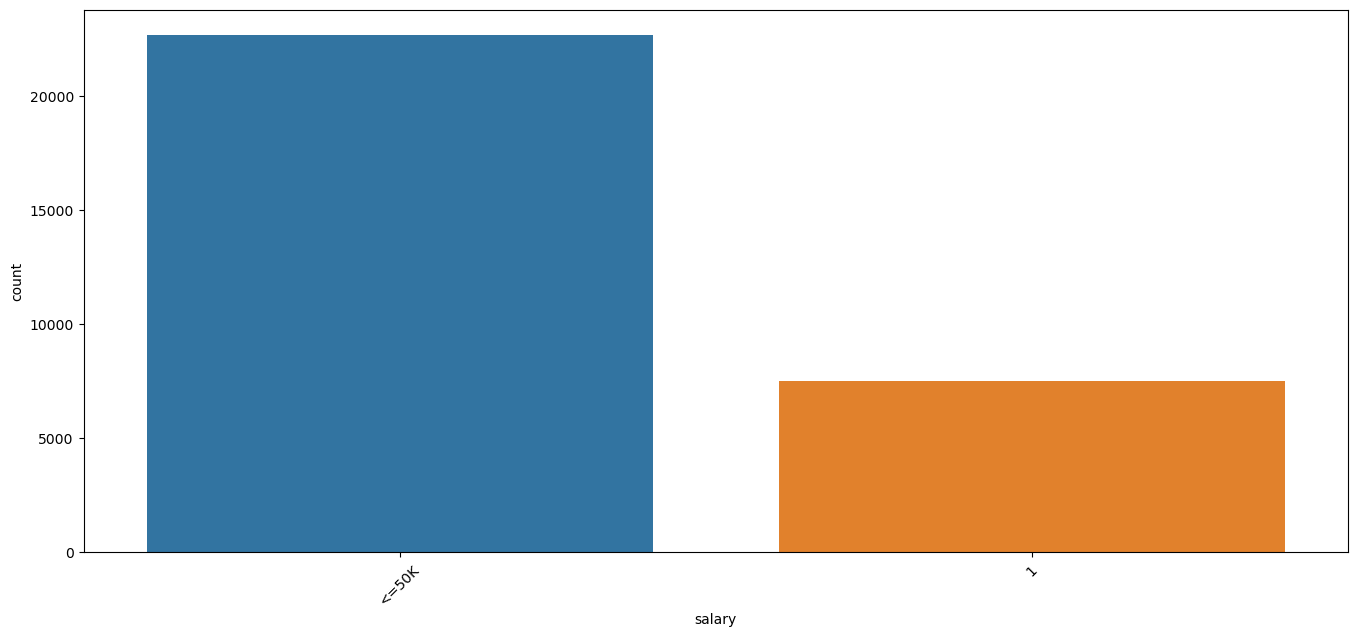

In [39]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [40]:
df[(list(df.columns)[1:])].corr()

,education-num,hours-per-week
education-num,1.000000,0.152522
hours-per-week,0.152522,1.000000


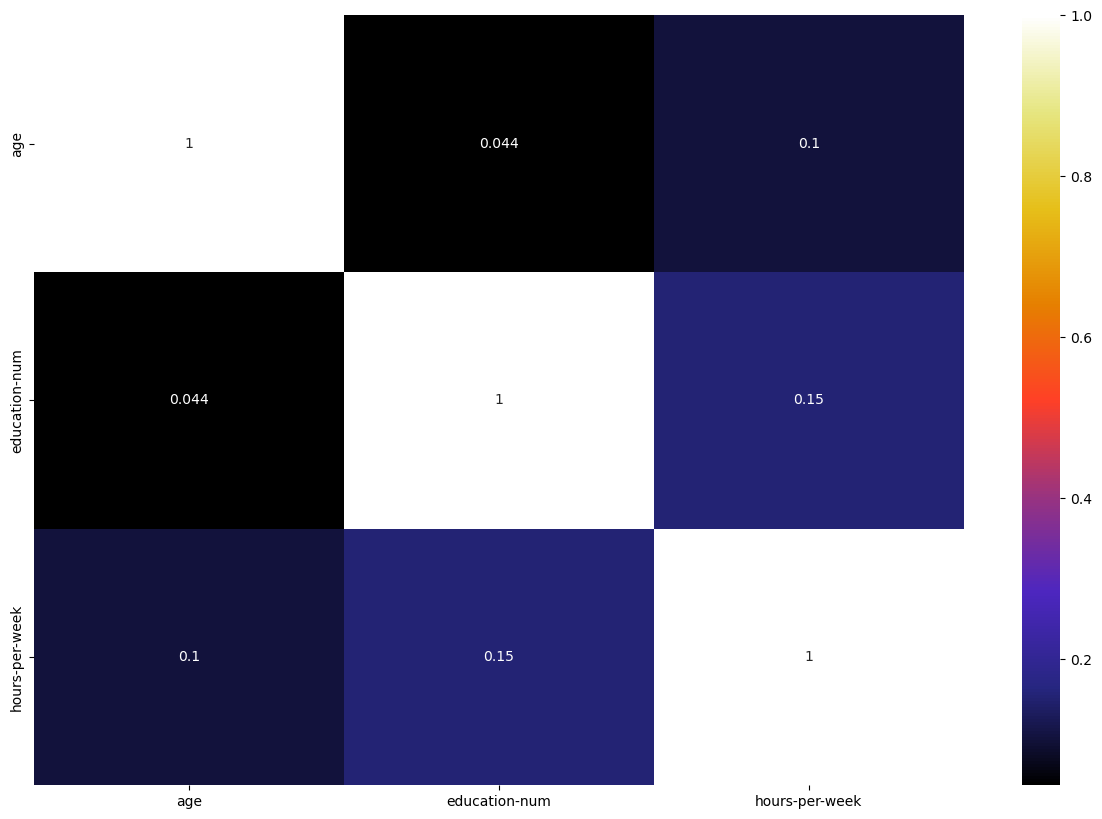

In [41]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [42]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['salary'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital-status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,country,Reject Null Hypothesis
8,salary,Reject Null Hypothesis


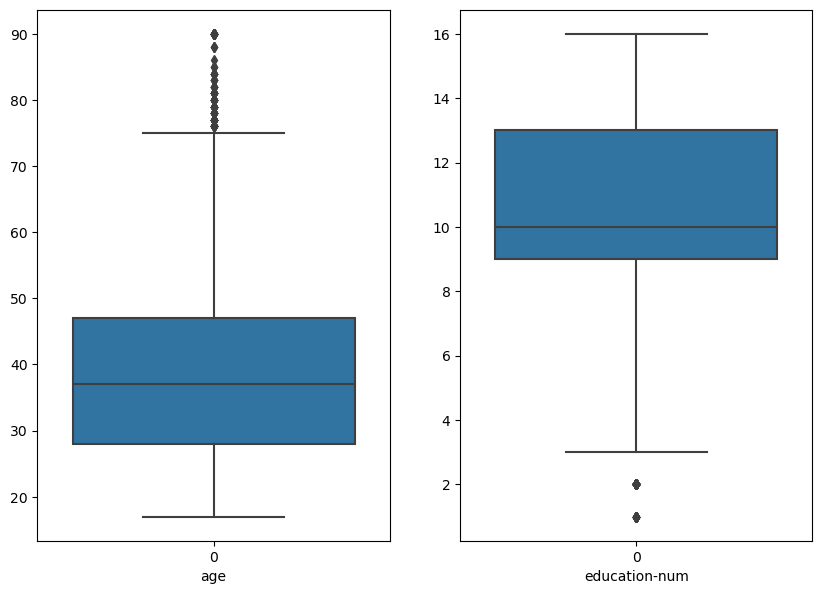

In [43]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

In [44]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()

In [45]:
replace_with_thresholds(df,num_col)

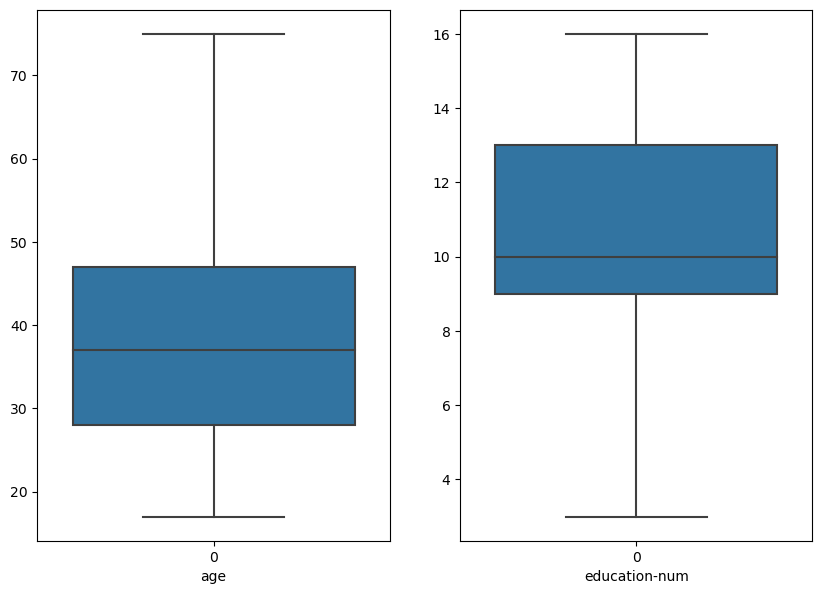

In [46]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

In [47]:
new_df = df.copy()

In [48]:
new_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [50]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
#data.drop('salary',axis=1,inplace=True)

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]
data_categorical.head()


data_encoded = encoder.fit_transform(data_categorical)

a = pd.DataFrame(data_encoded,columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country','salary'])
b = data[['age','hours-per-week']]
#c=data['hours-per-week']
new_df = pd.concat([b,a],axis=1)

In [51]:
new_df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,39,40,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,50,13,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,38,40,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,53,40,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,28,40,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32557,40,40,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32558,58,40,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0
32559,22,20,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0,0.0


In [52]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()


#for i in cat_col:
    #new_df[i]= label_encoder.fit_transform(new_df[i])

In [53]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21815, 10)
(21815,)
(10746, 10)
(10746,)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
model1.score(X_train,y_train)

0.7610818244327298

In [61]:
pred1 = model1.predict(X_test)

In [62]:
accuracy_score(y_test, pred1)

0.7657733109994417

In [63]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier()
model2.fit(X_train , y_train)

RandomForestClassifier()

In [64]:
model2.score(X_train,y_train)

0.9734586293834517

In [66]:
pred2 = model2.predict(X_test)

In [68]:
accuracy_score(y_test,pred2)

0.821142750790992

In [70]:
user_input=np.array([[39,40,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0]])
prediction = model2.predict(user_input)
if prediction ==0:
    print("income is <=50k")
else:
    print("income is >50k")

income is <=50k
